In [151]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from pydataset import data
from datetime import datetime

               VALUE
DATE                
2006-09-27  11689.24
2006-09-28  11718.45
2006-09-29  11679.07
2006-10-02  11670.35
2006-10-03  11727.34
2006-10-04  11850.61
2006-10-05  11866.69
2006-10-06  11850.21
2006-10-09  11857.81
2006-10-10  11867.17
2006-10-11  11852.13
2006-10-12  11947.70
2006-10-13  11960.51
2006-10-16  11980.60
2006-10-17  11950.02
2006-10-18  11992.68
2006-10-19  12011.73
2006-10-20  12002.37
2006-10-23  12116.91
2006-10-24  12127.88
2006-10-25  12134.68
2006-10-26  12163.66
2006-10-27  12090.26
2006-10-30  12086.50
2006-10-31  12080.73
2006-11-01  12031.02
2006-11-02  12018.54
2006-11-03  11986.04
2006-11-06  12105.55
2006-11-07  12156.77
2006-11-08  12176.54
2006-11-09  12103.30
2006-11-10  12108.43
2006-11-13  12131.88
2006-11-14  12218.01
2006-11-15  12251.71
2006-11-16  12305.82
2006-11-17  12342.56
2006-11-20  12316.54
2006-11-21  12321.59
2006-11-22  12326.95
2006-11-24  12280.17
2006-11-27  12121.71
2006-11-28  12136.45
2006-11-29  12226.73
2006-11-30  1

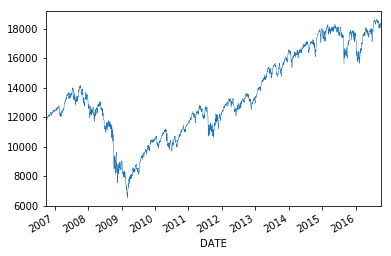

In [213]:
miss = ["n/a", "na", '.']
dj = pd.read_csv("DJIA.csv", na_values = miss).dropna()
dj['DATE'] = pd.to_datetime(dj['DATE'])
dj.set_index('DATE', inplace = True)
dj.dropna(inplace = True)
dj['VALUE'] = pd.to_numeric(dj['VALUE'], errors='coerce')
dj['VALUE'].plot(kind = 'line', lw=.5)
print(dj)

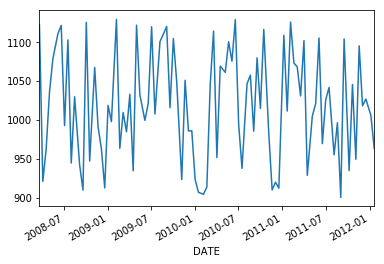

In [129]:
head = ["pay"]
pay = pd.read_csv("paychecks.csv", header = None )
pay.columns = ['pay']
date3 = pd.date_range(start = '3/13/2008', periods = 47, freq= "WOM-3FRI")
date1 = pd.date_range(start = '3/13/2008', periods = 46, freq= "WOM-1FRI")
date  = date1.union(date3)
pay['DATE'] = date
pay.set_index('DATE', inplace = True)
pay['pay'].plot()

In [174]:
dj = pd.read_csv("DJIA.csv")
dj['DATE'] = pd.to_datetime(dj['DATE'])
dj.set_index('DATE', inplace = True)
dj.dropna(inplace = True)
dj['VALUE'] = pd.to_numeric(dj['VALUE'], errors='coerce')

dj['dif'] = dj['VALUE'] - dj['VALUE'].shift(1)
dj['dif'][0] = 0
#print(dj)
print("The single day with the largest gain: ", dj['dif'].idxmax(), "; Value: " , dj['dif'].max())
print("The single day with the largest loss: ", dj['dif'].idxmin(), "; Value: " , dj['dif'].min())
tmp = dj.resample('M').sum()
tmp.dif = tmp.VALUE - tmp.VALUE.shift(1)
print("The single month with the largest gain: ", tmp['dif'].idxmax(), "; Value: " , tmp['dif'].max())
print("The single month with the largest loss: ", tmp['dif'].idxmin(), "; Value: " , tmp['dif'].min())



The single day with the largest gain:  2008-10-13 00:00:00 ; Value:  936.4200000000001
The single day with the largest loss:  2008-09-29 00:00:00 ; Value:  -777.6799999999985
The single month with the largest gain:  2006-10-31 00:00:00 ; Value:  228101.78000000003
The single month with the largest loss:  2016-09-30 00:00:00 ; Value:  -114792.98999999987


In [175]:
'''
#dj_m = dj[dj.index.is_month_start]
#print(dj_m)
M_ind = pd.date_range(start = '09/2006', end = '09/2016', freq= "M")
start = np.zeros((len(M_ind), 2))
firstlast = pd.DataFrame({"Date": M_ind, "First": start[:,0], "Last": start[:,1]})

print(firstlast)
dj.reset_index(level=0, inplace=True)
print(dj)
Mcount = 0
m_old = 0 
for index, row in dj.iterrows():
    if (row.DATE.month != m_old):
        m_old = row.DATE.month
        print("First day of the month value: ", row['VALUE'])
        print("Last day of the month value: ", dj.iloc[index - 1]['VALUE'])
        firstlast.iloc[Mcount]['First'] = row['VALUE'] 
        firstlast.iloc[Mcount]['Last'] = dj.iloc[index - 1]['VALUE']
        Mcount += 1
'''


'\n#dj_m = dj[dj.index.is_month_start]\n#print(dj_m)\nM_ind = pd.date_range(start = \'09/2006\', end = \'09/2016\', freq= "M")\nstart = np.zeros((len(M_ind), 2))\nfirstlast = pd.DataFrame({"Date": M_ind, "First": start[:,0], "Last": start[:,1]})\n\nprint(firstlast)\ndj.reset_index(level=0, inplace=True)\nprint(dj)\nMcount = 0\nm_old = 0 \nfor index, row in dj.iterrows():\n    if (row.DATE.month != m_old):\n        m_old = row.DATE.month\n        print("First day of the month value: ", row[\'VALUE\'])\n        print("Last day of the month value: ", dj.iloc[index - 1][\'VALUE\'])\n        firstlast.iloc[Mcount][\'First\'] = row[\'VALUE\'] \n        firstlast.iloc[Mcount][\'Last\'] = dj.iloc[index - 1][\'VALUE\']\n        Mcount += 1\n'

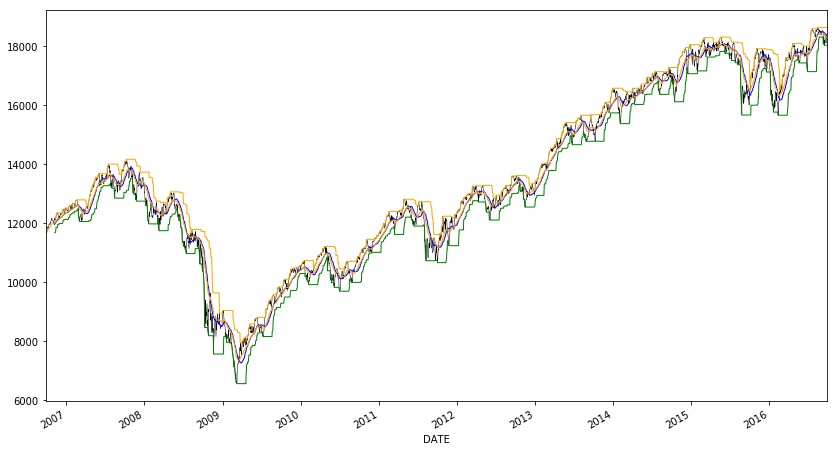

In [214]:
ax1 = plt.subplot(111)
dj.VALUE.plot(color = 'black',  lw=.5, ax = ax1, figsize = (14, 8))
dj.VALUE.rolling(window=30).mean().plot(color = 'b', lw = 1, ax = ax1)
dj.VALUE.rolling(window=30).min().plot(color = 'g', lw = 1, ax = ax1)
dj.VALUE.rolling(window=30).max().plot(color = 'orange', lw = 1, ax = ax1)
dj.VALUE.ewm(span=30).mean().plot(color = 'orange', lw = 1, ax = ax1)

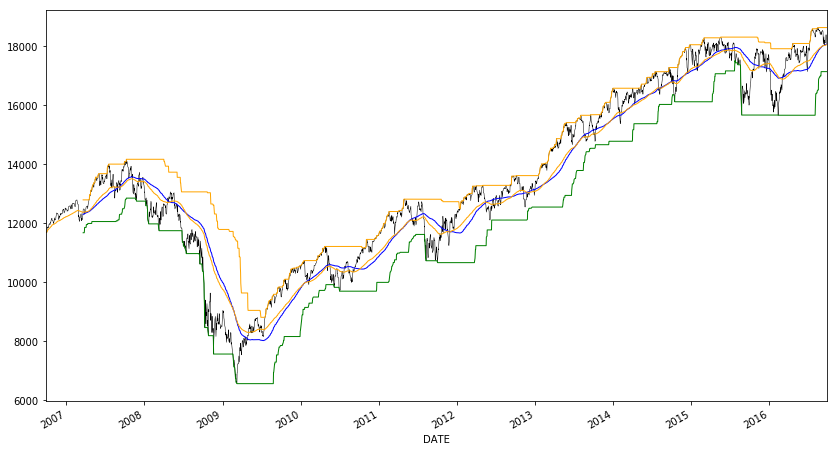

In [215]:
ax2 = plt.subplot(111)
dj.VALUE.plot(color = 'black',  lw=.5, ax = ax2, figsize = (14, 8))
dj.VALUE.rolling(window=120).mean().plot(color = 'b', lw = 1, ax = ax2, figsize = (14, 8))
dj.VALUE.rolling(window=120).min().plot(color = 'g', lw = 1, ax = ax2, figsize = (14, 8))
dj.VALUE.rolling(window=120).max().plot(color = 'orange', lw = 1, ax = ax2, figsize = (14, 8))
dj.VALUE.ewm(span=120).mean().plot(color = 'orange', lw = 1, ax = ax2, figsize = (14, 8))

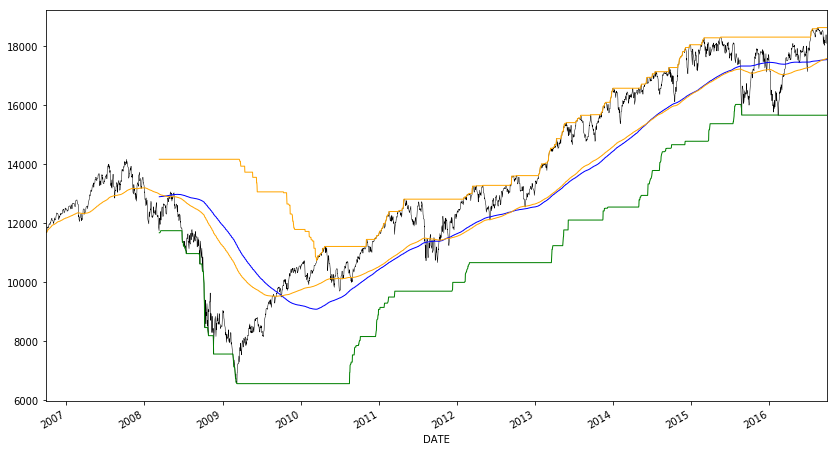

In [218]:
ax3 = plt.subplot(111)
dj.VALUE.plot(color = 'black',  lw=.5, ax = ax3, figsize = (14, 8))
dj.VALUE.rolling(window=365).mean().plot(color = 'b', lw = 1, ax = ax3, figsize = (14, 8))
dj.VALUE.rolling(window=365).min().plot(color = 'g', lw = 1, ax = ax3, figsize = (14, 8))
dj.VALUE.rolling(window=365).max().plot(color = 'orange', lw = 1, ax = ax3, figsize = (14, 8))
dj.VALUE.ewm(span=365).mean().plot(color = 'orange', lw = 1, ax = ax3, figsize = (14, 8))

Interpretation: Bruh